In [57]:
from simulation import monte_carlo_simulation
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import f_oneway

## Hypothesis 2. Higher seat occupancy leads to longer evacuation times due to congestion

Average evacuation time: 158.31 seconds
Standard deviation: 24.73 seconds


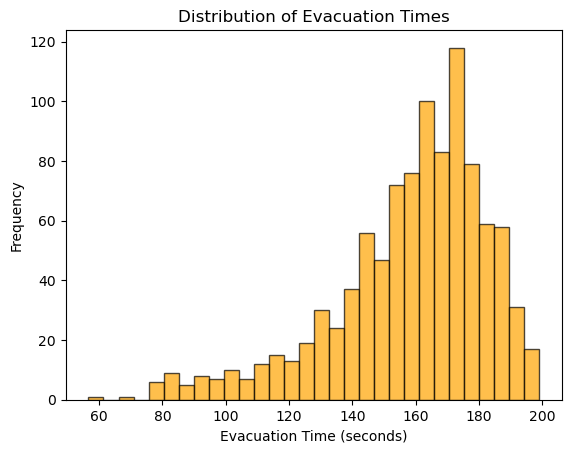

In [34]:
rows = 30           # Number of rows in the plane
seats_per_row = 6   # Seats per row (standard economy configuration)
exits = [0, 15, 29] # Locations of exits (front, middle, back exits)
speed_factor = 0.6  # First three rows move faster (80% of the normal time)
door_opening_time = 2  # Time for middle exit door to open (2 seconds)
num_simulations = 1000
proportion_old = 0.3  # 30% old passengers
old_in_first_3_rows_prob = 0.6  # 70% chance for old passengers to sit in the first 3 rows
emergency_level = 0.9  # Emergency level: 0.0 (low) to 1.0 (high)
occupancy_rate = 0.8  # 80% of seats are occupied

evacuation_times = monte_carlo_simulation(rows, seats_per_row, exits, speed_factor, door_opening_time, num_simulations,
                                          proportion_old, old_in_first_3_rows_prob, emergency_level, occupancy_rate)

# Analyze the results
average_time = np.mean(evacuation_times)
std_deviation = np.std(evacuation_times)

print(f"Average evacuation time: {average_time:.2f} seconds")
print(f"Standard deviation: {std_deviation:.2f} seconds")

# Plot the results
plt.hist(evacuation_times, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Evacuation Times')
plt.xlabel('Evacuation Time (seconds)')
plt.ylabel('Frequency')
plt.show()

Occupancy Rate 50.0% - Average Evacuation Time: 139.61 seconds, Standard Deviation: 33.70 seconds
Occupancy Rate 60.0% - Average Evacuation Time: 149.40 seconds, Standard Deviation: 28.96 seconds
Occupancy Rate 70.0% - Average Evacuation Time: 151.57 seconds, Standard Deviation: 27.91 seconds
Occupancy Rate 75.0% - Average Evacuation Time: 156.99 seconds, Standard Deviation: 25.81 seconds
Occupancy Rate 80.0% - Average Evacuation Time: 156.10 seconds, Standard Deviation: 25.65 seconds
Occupancy Rate 85.0% - Average Evacuation Time: 159.38 seconds, Standard Deviation: 22.98 seconds
Occupancy Rate 90.0% - Average Evacuation Time: 160.82 seconds, Standard Deviation: 22.10 seconds
Occupancy Rate 95.0% - Average Evacuation Time: 161.15 seconds, Standard Deviation: 22.20 seconds
Occupancy Rate 100.0% - Average Evacuation Time: 162.35 seconds, Standard Deviation: 21.81 seconds


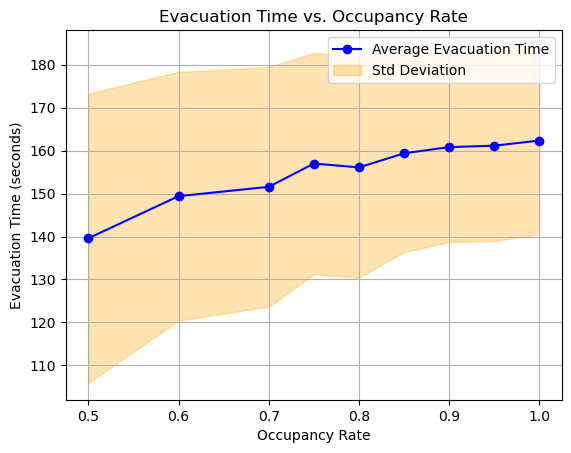

In [53]:
# Define the different occupancy rates to test
occupancy_rates = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]  # 70%, 75%, 80%, 85%, 90%, 95%, 100% occupancy
average_times = []  # To store the average evacuation times for each proportion
std_deviations = []  # To store the standard deviations for each proportion

# Loop through different old passenger proportions
for occupancy_rate in occupancy_rates:
    evacuation_times = monte_carlo_simulation(rows, seats_per_row, exits, speed_factor, door_opening_time, num_simulations,
                                              proportion_old, old_in_first_3_rows_prob, emergency_level, occupancy_rate)
    
    # Calculate the average evacuation time and standard deviation
    average_time = np.mean(evacuation_times)
    std_deviation = np.std(evacuation_times)
    
    average_times.append(average_time)
    std_deviations.append(std_deviation)
    
    print(f"Occupancy Rate {occupancy_rate*100}% - Average Evacuation Time: {average_time:.2f} seconds, Standard Deviation: {std_deviation:.2f} seconds")

# Visualize the evacuation times for different occupancy rates
plt.plot(occupancy_rates, average_times, marker='o', linestyle='-', color='b', label='Average Evacuation Time')
plt.fill_between(occupancy_rates, np.array(average_times) - np.array(std_deviations),
                 np.array(average_times) + np.array(std_deviations), color='orange', alpha=0.3, label='Std Deviation')
plt.title('Evacuation Time vs. Occupancy Rate')
plt.xlabel('Occupancy Rate')
plt.ylabel('Evacuation Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Define the different occupancy rates to test
occupancy_rates = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]  # 70%, 75%, 80%, 85%, 90%, 95%, 100% occupancy
evacuation_times_by_rate = []  # To store evacuation times for each occupancy rate

# Loop through different occupancy rates and collect evacuation times
for occupancy_rate in occupancy_rates:
    evacuation_times = monte_carlo_simulation(rows, seats_per_row, exits, speed_factor, door_opening_time, num_simulations,
                                              proportion_old, old_in_first_3_rows_prob, emergency_level, occupancy_rate)
    evacuation_times_by_rate.append(evacuation_times)

# Perform ANOVA to test if there is a significant difference in evacuation times
f_statistic, p_value = f_oneway(*evacuation_times_by_rate)

# Display the result of the ANOVA
print(f"ANOVA Test Result:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Determine if the difference is statistically significant
if p_value < 0.05: # Significance level
    print("Reject the null hypothesis: The difference in evacuation times is statistically significant")
else:
    print("Fail to reject the null hypothesis: The difference in evacuation times is not statistically significant")

ANOVA Test Result:
F-statistic: 20.3044
P-value: 0.0000
Reject the null hypothesis: The difference in evacuation times is statistically significant
